<a href="https://colab.research.google.com/github/quincynjoroge/Crime-Analysis-/blob/Transformer_model/RNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics.pairwise import cosine_similarity
import heapq
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
 
import matplotlib.pyplot as plt
 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
 
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
#from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#wandb
!pip install wandb
import wandb
wandb.login()
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from wandb.keras import WandbCallback
import random

In [4]:
#Intialize
wandb.init(project="Crime")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
crime= pd.read_csv('/content/drive/MyDrive/GROUP 2/CSVfiles2/crime-vectorised.csv')

In [10]:
crime

,Unnamed: 0,tweet,location,created_at,hashtags,label,clean_text
0,0,matharesjustice wanjirunjira uhaiwetu gacheke2...,"Nairobi, Kenya",8/17/2021 8:59,[],0,matharesjustice wanjirunjira uhaiwetu gacheke ...
1,1,it is not easy being a young person in this co...,"Nairobi, Kenya",8/17/2021 8:52,[],0,easy young person country survive kcse kuccps ...
2,2,you come to voters begging for votes yet none ...,Nairobi Kenya,8/17/2021 8:48,[],0,come voter beg vote yet none yall politician c...
3,3,it would be wise if we have bloggers with cont...,"Nairobi, Kenya",8/17/2021 7:45,[],0,would wise blogger content drive agenda succes...
4,4,before you vote ask your candidates what theyl...,"Thika, Kenya",8/17/2021 7:44,[],0,vote ask candidate theyll police brutality tak...
...,...,...,...,...,...,...,...
2995,2995,uhuru pawns hungertorture impunity judiciary i...,Kenya,8/13/2021 17:08,[],2,uhuru pawn hungertorture impunity judiciary ip...
2996,2996,danaceda olivermathenge how i wish they could ...,"Nairobi, Kenya",8/13/2021 16:57,[],2,danaceda olivermathenge wish could prioritise ...
2997,2997,same way the govt here has been much more succ...,"Kampala, Uganda",8/13/2021 16:55,[],2,way govt much successful war sport war corruption
2998,2998,mukami atellah zalan amp namu kenya instituti...,"Nairobi, Kenya",8/13/2021 16:51,[],2,mukami atellah zalan amp namu kenya institutio...


In [11]:
crime.loc[crime['clean_text'].str.contains('police')].label.value_counts()

0    766
1    198
2     25
Name: label, dtype: int64

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(crime['clean_text'])

In [13]:
print(vectors)

  (0, 3598)	1
  (0, 6231)	1
  (0, 5966)	1
  (0, 2190)	1
  (0, 234)	1
  (0, 4496)	1
  (0, 3111)	1
  (0, 533)	1
  (0, 3664)	1
  (0, 2087)	1
  (1, 1662)	1
  (1, 6443)	1
  (1, 4421)	1
  (1, 1195)	1
  (1, 5601)	1
  (1, 3086)	1
  (1, 3259)	1
  (1, 516)	1
  (1, 2951)	1
  (1, 4545)	1
  (2, 4496)	1
  (2, 1006)	1
  (2, 6181)	1
  (2, 529)	1
  (2, 6180)	1
  :	:
  (2998, 3111)	1
  (2998, 2473)	1
  (2998, 1165)	1
  (2998, 241)	1
  (2998, 1179)	1
  (2998, 746)	1
  (2998, 5709)	1
  (2998, 2782)	1
  (2998, 3862)	1
  (2998, 394)	1
  (2998, 6462)	1
  (2998, 3980)	1
  (2998, 1709)	1
  (2999, 5641)	1
  (2999, 5783)	1
  (2999, 3389)	1
  (2999, 5510)	1
  (2999, 6096)	1
  (2999, 5309)	1
  (2999, 1322)	1
  (2999, 2142)	1
  (2999, 4912)	1
  (2999, 293)	1
  (2999, 1573)	1
  (2999, 3993)	1


GRU (Gated Recurrent Unit) aims to solve the vanishing gradient problem which comes with a standard recurrent neural network

In [14]:
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [15]:
xtrain, xvalid, ytrain, yvalid = train_test_split(crime.clean_text.values, crime.label.values, 
                                                  stratify=crime.label.values, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [16]:
xtrain.shape,xvalid.shape,ytrain.shape,yvalid.shape

((2400,), (600,), (2400,), (600,))

In [17]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 1500

token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)

#zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

In [18]:

#with strategy.scope():
    # A simpleRNN without any pretrained embeddings and one dense layer
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     input_length=max_len))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1500, 300)         1950000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               40100     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 1,990,201
Trainable params: 1,990,201
Non-trainable params: 0
_________________________________________________________________


In [19]:
mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
    # A simpleRNN without any pretrained embeddings and one dense layer
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                     300,
                     input_length=max_len))
    model.add(SimpleRNN(100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.summary()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1500, 300)         1950000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               40100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,990,201
Trainable params: 1,990,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(xtrain_pad, ytrain, epochs=5, batch_size=64*mirrored_strategy.num_replicas_in_sync,callbacks=[WandbCallback()])
wandb.finish()

Epoch 1/5
38/38 [==============================] - 53s 1s/step - loss: 0.0080 - accuracy: 0.3363
Epoch 2/5
38/38 [==============================] - 49s 1s/step - loss: -2.2467 - accuracy: 0.5337
Epoch 3/5
38/38 [==============================] - 49s 1s/step - loss: -4.5389 - accuracy: 0.5979
Epoch 4/5
38/38 [==============================] - 49s 1s/step - loss: -6.7057 - accuracy: 0.6208
Epoch 5/5
38/38 [==============================] - 50s 1s/step - loss: -8.7269 - accuracy: 0.6400


epoch,4
loss,-8.72688
accuracy,0.64
_runtime,523
_timestamp,1629318060
_step,4


epoch,▁▃▅▆█
loss,█▆▄▃▁
accuracy,▁▆▇██
_runtime,▁▃▅▆█
_timestamp,▁▃▅▆█
_step,▁▃▅▆█


In [22]:
loss, accuracy = model.evaluate(xtrain_pad,ytrain, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(xvalid_pad, yvalid, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.6471
Testing Accuracy:  0.5650


In [ ]:
scores = model.predict(xvalid_pad)
print(scores)

[[1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.59976292e-03]
 [1.27569233e-10]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.78970030e-08]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.65987956e-06]
 [9.99998033e-01]
 [3.47871940e-11]
 [5.57814630e-08]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [7.53014628e-09]
 [1.00000000e+00]
 [1.63869396e-09]
 [9.99998689e-01]
 [2.42990100e-10]
 [1.00000000e+00]
 [2.92455516e-05]
 [4.71885784e-08]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.99082899e-04]
 [2.95629323e-01]
 [1.00000000e+00]
 [9.99999762e-01]
 [1.00000000e+00]
 [5.37763867e-07]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.97332931e-01]
 [1.00000000e+00]
 [9.92051840e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.05478309e-08]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.000000

# hyperparameter tuning

# Manual Search 

In [23]:
model = RandomForestClassifier(n_estimators=10, random_state= 101).fit(xtrain_pad,ytrain)
predictionforest = model.predict(xvalid_pad)
print(confusion_matrix(yvalid,predictionforest))
print(classification_report(yvalid,predictionforest))
acc2 = accuracy_score(yvalid,predictionforest)

[[138  31  31]
 [ 54 114  32]
 [ 22  37 141]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.67       200
           1       0.63      0.57      0.60       200
           2       0.69      0.70      0.70       200

    accuracy                           0.66       600
   macro avg       0.65      0.65      0.65       600
weighted avg       0.65      0.66      0.65       600



# RandomizedSearch 

In [24]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(xtrain_pad,ytrain)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.1s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

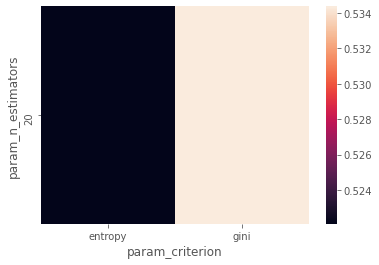

In [25]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

In [26]:
predictionforest = model.best_estimator_.predict(xvalid_pad)
print(confusion_matrix(yvalid,predictionforest))
print(classification_report(yvalid,predictionforest))
acc3 = accuracy_score(yvalid,predictionforest)

[[111  19  70]
 [ 68  50  82]
 [ 24  10 166]]
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       200
           1       0.63      0.25      0.36       200
           2       0.52      0.83      0.64       200

    accuracy                           0.55       600
   macro avg       0.57      0.55      0.52       600
weighted avg       0.57      0.55      0.52       600



# Grid Search

In [27]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 2, verbose= 5, n_jobs = -1)
model.fit(xtrain_pad,ytrain)

predictionforest = model.best_estimator_.predict(xvalid_pad)
print(confusion_matrix(yvalid,predictionforest))
print(classification_report(yvalid,predictionforest))
acc4 = accuracy_score(yvalid,predictionforest)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.3s finished


[[119  22  59]
 [ 62  43  95]
 [ 48  10 142]]
              precision    recall  f1-score   support

           0       0.52      0.59      0.55       200
           1       0.57      0.21      0.31       200
           2       0.48      0.71      0.57       200

    accuracy                           0.51       600
   macro avg       0.52      0.51      0.48       600
weighted avg       0.52      0.51      0.48       600



# Optuna

Optuna is an automatic hyperparameter optimization software framework, particularly designed for machine learning. It features an imperative, define-by-run style user API. Optuna is a framework designed for the automation and the acceleration of the optimization studies

In [28]:
!pip install optuna

     |████████████████████████████████| 302 kB 4.1 MB/s 
     |████████████████████████████████| 80 kB 7.4 MB/s 
     |████████████████████████████████| 164 kB 44.0 MB/s 
     |████████████████████████████████| 75 kB 3.8 MB/s 
     |████████████████████████████████| 141 kB 42.0 MB/s 
     |████████████████████████████████| 111 kB 42.6 MB/s 
     |████████████████████████████████| 49 kB 4.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=283b361c3f4fcffab18cebc2e1a2767d0c364114f73c97b725b5759e2add9a0b
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm
import optuna

# 1. Define an objective function to be maximized.
def objective(trial):
    iris = crime
    x, y = xtrain, ytrain
    # 2. Suggest values for the hyperparameters using a trial object.
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest'])
    if classifier_name == 'SVC':
         svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
         classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
    else:
        rf_max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 32))
        classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)
    ...
    return accuracy


# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-08-18 14:55:06,197] A new study created in memory with name: no-name-431846e5-b2d2-4fc0-ab9b-2145240e2b93
[I 2021-08-18 14:55:06,204] Trial 0 finished with value: 0.574999988079071 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 9.205639379767822}. Best is trial 0 with value: 0.574999988079071.
[I 2021-08-18 14:55:06,207] Trial 1 finished with value: 0.574999988079071 and parameters: {'classifier': 'SVC', 'svc_c': 6.465309910902157e-06}. Best is trial 0 with value: 0.574999988079071.
[I 2021-08-18 14:55:06,211] Trial 2 finished with value: 0.574999988079071 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 29.812206945454697}. Best is trial 0 with value: 0.574999988079071.
[I 2021-08-18 14:55:06,216] Trial 3 finished with value: 0.574999988079071 and parameters: {'classifier': 'SVC', 'svc_c': 162341491.31832802}. Best is trial 0 with value: 0.574999988079071.
[I 2021-08-18 14:55:06,220] Trial 4 finished with value: 0.574999988079071 and parameters: {

In [ ]:
print(accuracy)

0.574999988079071


In [ ]:
predictionforest = model.best_estimator_.predict(xvalid_pad)
print(confusion_matrix(yvalid,predictionforest))
print(classification_report(yvalid,predictionforest))


[[117  17  66]
 [ 75  52  73]
 [ 45  12 143]]
              precision    recall  f1-score   support

           0       0.49      0.58      0.54       200
           1       0.64      0.26      0.37       200
           2       0.51      0.71      0.59       200

    accuracy                           0.52       600
   macro avg       0.55      0.52      0.50       600
weighted avg       0.55      0.52      0.50       600



The best hyperparameter tuning is the manaual search with 66% accuracy, the rest of the tuning are less.